Mean squared error: 0.35
Mean squared error: 0.00
Mean squared error: 0.00


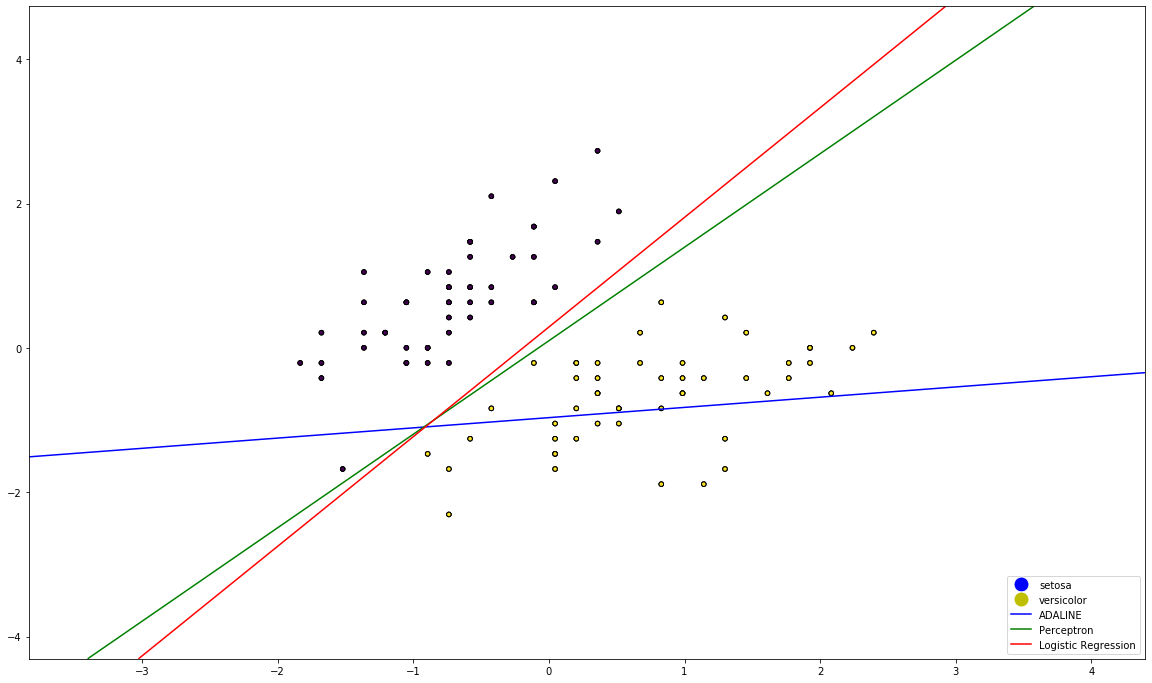

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from matplotlib.lines import Line2D

target_names=iris.target_names
iris = datasets.load_iris()
# we create 50 separable points
X = iris.data[:-50, :2]
Y = iris.target[:-50]
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
colors = np.array(['b', 'y'])
fig, ax = plt.subplots( figsize=(20, 12))

handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
handlers.append(Line2D([0], [0], color='b', label='ADALINE'))
handlers.append(Line2D([0], [0], color='g', label='Perceptron'))
handlers.append(Line2D([0], [0], color='r', label='Logistic Regression'))
ax.legend(handles=handlers, loc='lower right')


for  i, col in zip(
                        ["squared_loss", "perceptron", "log" ],
                        ['b', 'g','r']):
    clf = SGDClassifier(loss=i,max_iter=5000, tol=1e-5)
    clf.fit(X, Y)
    y_pred = clf.predict(X)
    print("Mean squared error: %.2f"
          % mean_squared_error(Y, y_pred))
    # plot the line, the points, and the nearest vectors to the plane
    xlim = (min(X[:,0])-2, max(X[:,0])+2)
    ylim = (min(X[:,1])-2, max(X[:,1])+2)
    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    X1, X2 = np.meshgrid(xg, yg)
    objects = np.c_[X1.ravel(),X2.ravel()]   
    
    Z = np.array([clf.decision_function([obj]) for obj in objects])
    Z = Z.reshape(X1.shape)   
 
    a=ax.contour(X1, X2, Z, [0], colors=col )
    ax.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='black', s=20)

plt.show()
